In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from matplotlib import pyplot as plt
sns.set()

In [79]:
df = pd.read_csv("minor_augmented_final_CSA_data.csv")

This is PIT count data for just 2017, for the 20 CSAs list below. In the following, Pit Count is the total pit count: sheltered, unsheltered, and permanently housed. 

In [32]:
df.CSA.to_list()

['Atlanta--Athens-Clarke County--Sandy Springs, GA CSA',
 'Boston-Worcester-Providence, MA-RI-NH-CT CSA',
 'Chicago-Naperville, IL-IN-WI CSA',
 'Cleveland-Akron-Canton, OH CSA',
 'Dallas-Fort Worth, TX-OK CSA',
 'Denver-Aurora, CO CSA',
 'Detroit-Warren-Ann Arbor, MI CSA',
 'Fresno-Madera, CA CSA',
 'Houston-The Woodlands, TX CSA',
 'Los Angeles-Long Beach, CA CSA',
 'Miami-Fort Lauderdale-Port St. Lucie, FL CSA',
 'Minneapolis-St. Paul, MN-WI CSA',
 'New York-Newark, NY-NJ-CT-PA CSA',
 'Orlando-Deltona-Daytona Beach, FL CSA',
 'Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA',
 'Portland-Vancouver-Salem, OR-WA CSA',
 'Sacramento-Roseville, CA CSA',
 'San Jose-San Francisco-Oakland, CA CSA',
 'Seattle-Tacoma, WA CSA',
 'Washington-Baltimore-Arlington, DC-MD-VA-WV-PA CSA']

For some basic analysis, using the cut function, I broke the data into two categories of 
low-homeless and high-homeless, to be able to better contrast these rudimentary groupings. Some basic summary stats for these groupings are below.  
df["split"] = pd.cut(df["homeless_pop_percentage"],2, labels=["low-homelessness", "high_homelessness"])

One thing to note is that the high homeless grouping has a $14.7 thousand higher median household income and a $504 higher monthly rental cost. 

In [82]:
df_low_filter = df.split == 'low-homelessness'
df_high_filter = df.split == 'high_homelessness'

df_high = df[df_high_filter]
df_low = df[df_low_filter]

In [71]:
df_low[["Total PIT","homeless_pop_percentage","median_household_income 2017","housing_cost 2017","rental_cost 2017","rent_to_income_ratio 2017"]].describe()

,Total PIT,homeless_pop_percentage,median_household_income 2017,housing_cost 2017,rental_cost 2017,rent_to_income_ratio 2017
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,12822.500000,0.002418,62004.550000,216957.998000,1386.918000,0.295000
std,6355.721329,0.000678,8473.812661,66220.740659,278.834213,0.049721
min,3312.000000,0.001513,51198.060000,113925.000000,793.420000,0.220000
25%,10355.000000,0.001840,54320.795000,192750.000000,1321.337500,0.280000
50%,11298.500000,0.002507,64535.560000,207822.585000,1374.815000,0.290000
75%,17633.250000,0.002970,67231.177500,221635.620000,1496.085000,0.307500
max,22348.000000,0.003228,76407.820000,376341.100000,1800.050000,0.410000


In [84]:
df_high[["Total PIT","homeless_pop_percentage","median_household_income 2017","housing_cost 2017","rental_cost 2017","rent_to_income_ratio 2017"]].describe()

,Total PIT,homeless_pop_percentage,median_household_income 2017,housing_cost 2017,rental_cost 2017,rent_to_income_ratio 2017
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,46855.30000,0.005149,76772.749000,402775.593000,1891.264000,0.319000
std,41027.44687,0.000903,12364.302959,191201.405097,529.278392,0.062084
min,10975.00000,0.004111,58232.840000,144720.470000,1154.340000,0.240000
25%,19037.25000,0.004351,68990.852500,340912.092500,1626.977500,0.272500
50%,33488.50000,0.004963,75262.890000,369033.255000,1816.925000,0.310000
75%,52651.50000,0.005808,80083.570000,411868.520000,2082.022500,0.357500
max,138592.00000,0.006566,101798.820000,860125.810000,3029.770000,0.430000


Below we can see that the areas of high homelessness have notably higher results for all of the varibles we care about (all values have been scaled so that they can be directly compared in magnitude). Note: I think all the variables except "overcrowded" are self explainatory. Overcrowded was created by using ACS data for rental units that have an average of 1.5 people or more per room divided by the total rental housing stock of a CSA. 

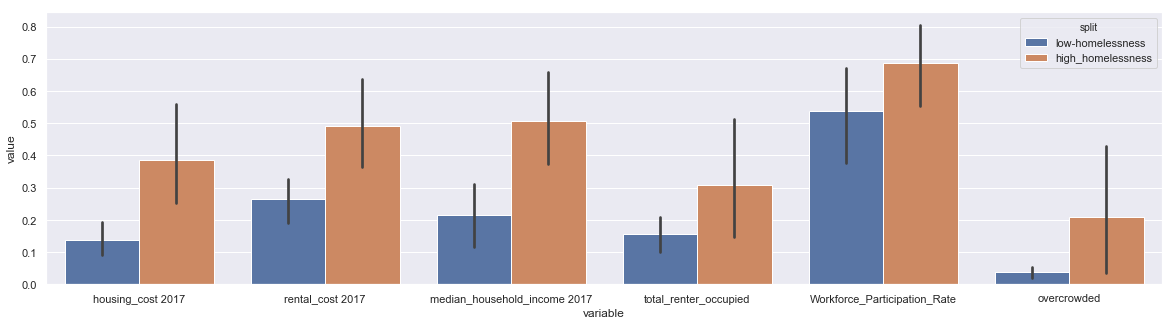

In [101]:
df = pd.read_csv('minor_augmented_final_CSA_data.csv').drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
scaled_df = pd.DataFrame(scaler.fit_transform(df.drop(['CSA', 'split'], axis=1)), 
             columns=df.drop(['CSA', 'split'], axis=1).columns)
             
df[scaled_df.columns] = scaled_df
cols2keep = ['housing_cost 2017', 
             'rental_cost 2017',
            'median_household_income 2017',
            'total_renter_occupied',

            'Workforce_Participation_Rate',
            'overcrowded']
plt.figure(figsize=(20,5))
g = sns.barplot(x='variable', y='value', hue='split', 
            data=df[cols2keep+['split','CSA']].melt(id_vars=['split', 'CSA']))

Before getting into regression outputs below, here can see there there is definitely a positive relationship between the ratio of rental costs to income to the total pit count figure. 

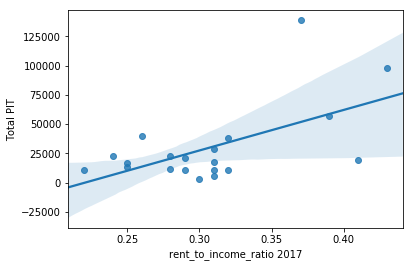

In [5]:
ax = sns.regplot(x='rent_to_income_ratio 2017', y="Total PIT", data=df)

Below we can see that as the median household income increase, there is an associated rise 
in the percentage of the population experiencing homelessness. 

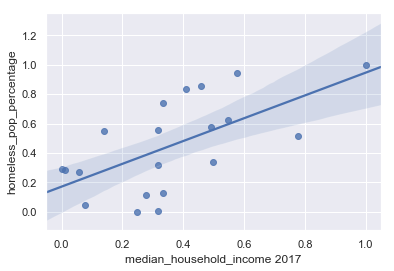

In [94]:
ax = sns.regplot(x='median_household_income 2017', y="homeless_pop_percentage", data=df)

We can see that in this simple model each $20 increase in housing costs is related to one more person experiencing homelessness. Below we see basically the exact same relationship between rental costs and one more person experiencing homelessness. Housing and rental costs are both statistically significant. 

In [86]:
y = df['Total Homeless PIT']
X = df["housing_cost 2017"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total Homeless PIT   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     19.97
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           0.000263
Time:                        16:16:45   Log-Likelihood:                -225.86
No. Observations:                  20   AIC:                             453.7
Df Residuals:                      19   BIC:                             454.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
housing_cost 2017     0.0568      0.013      4.469      0.000       0.030       0.083
==============================================================================
Omnibus:                       33.837   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.549
Skew:                           2.842   Prob(JB):                     2.91e-16
Kurtosis:                      10.319   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
y = df['Total Homeless PIT']
X = df["rental_cost 2017"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total Homeless PIT   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     22.40
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           0.000145
Time:                        15:56:00   Log-Likelihood:                 3.8506
No. Observations:                  20   AIC:                            -5.701
Df Residuals:                      19   BIC:                            -4.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
rental_cost 2017     0.5000      0.106      4.733      0.000       0.279       0.721
==============================================================================
Omnibus:                       33.831   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.717
Skew:                           2.856   Prob(JB):                     4.41e-16
Kurtosis:                      10.227   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""